In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from mpmath import nsum

In [5]:
from utils.dataset import Dataset
from utils.evaluate import Evalutate

from methods.lecture import lecture_posterior, lecture_prior

In [6]:
dataset = Dataset()
dataset.set_data()
dataset.T

15

In [7]:
evaluate = Evalutate(dataset=dataset, prior=lecture_prior, nparams=3)

In [8]:
evaluate.evaluate(lecture_posterior)

In [9]:
pi_theta1_theta2 = lambda theta1, theta2, t: integrate.quad(lambda theta3: evaluate.posteriors[t](theta1, theta2, theta3), 0, 1)[0]
pi_theta2 = lambda theta2, t: float(nsum(lambda theta1: pi_theta1_theta2(theta1, theta2, t), [evaluate.dataset.cum_nt[t], np.inf]))

In [10]:
P_chongwen_is_true_love = lambda t: pi_theta2(0, t)

Text(0, 0.5, 'P(Chongwen is true love)')

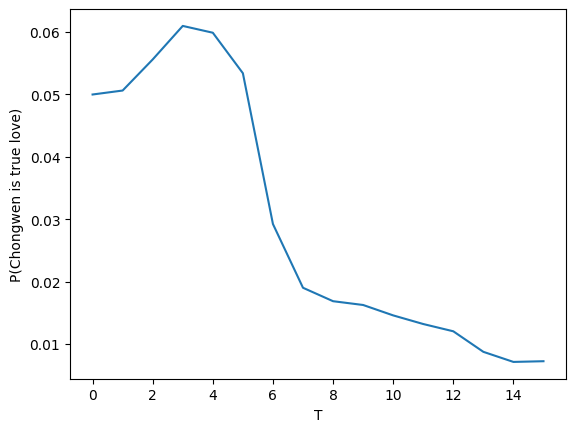

In [11]:
t_linspace = np.arange(0, dataset.T+1)
plt.plot(t_linspace, [P_chongwen_is_true_love(t) for t in t_linspace])
plt.xlabel('T')
plt.ylabel('P(Chongwen is true love)')